# Trends in Non-Random Sequences

So far, you've explored trends in sequences of random floats. What if the sequences aren't random?

## Trends in A Sorted Sequence

A monotonically increasing sequence is a single trend.
In a monotonically decreasing sequence, each element is its own trend.

You can write code to check that.

In [7]:
from random import random
import trends

In [ ]:
# a random sequence
seq = [random() for _ in range(100)]
trendlist, _ = trends.decompose(seq)
len(trendlist)

In [ ]:
# the same random numbers after sorting
sorted_seq = sorted(seq)
trendlist, _ = trends.decompose(sorted_seq)
len(trendlist)

In [ ]:
# the same numbers after sorting into descending order
reverse_sorted_seq = sorted(seq, reverse=True)
trendlist, _ = trends.decompose(reverse_sorted_seq)
len(trendlist)

## Trends in a Trend

What other kind of special sequence can you decompose? How about a trend?

Trends should be fairly easy to come by. A sequence of length $n$, which has $n!$ permutations; 
of those, $(n-1)$ are single trends.

Let's once again work with lists of powers of two:

In [ ]:
def pows(n, base=2):
    # Return first <n> non-negative powers of <base>.
    # Default is powers of 2.
    return [2**k for k in range(n)]

In a trend, the mean of every prefix must be less than the mean of the entire sequence,
so here's one way to ask whether a sequence is a trend:

In [ ]:
from statistics import mean

def is_trend(s):
        mean_s = mean(s)
        for pos in range(1, len(s)+1):
            if mean(s[:pos]) > mean_s:
                return False
        return True

In [ ]:
is_trend((1,2,4,8,16))

In [ ]:
import itertools

def single_trends(s):
    # return a list of all the permutations of the elements of s
    # s can be any iterable
    _perms = itertools.permutations(s)
    for perm in _perms:
        if is_trend((perm)):
            yield list(perm)

for trend in single_trends(pows(4)):
    print(trend)
    
# and, just counting for a larger case
from math import factorial

n = 9
number_of_single_trends = 0
for _ in single_trends(pows(n)):
    number_of_single_trends += 1
number_of_single_trends == factorial(n-1)

But of course, decomposing any of these into trends isn't even interesting, right? They're already trends.
What, however, if you flip them around?

Here's why that's interesting.

Everything that we've decided about trends so far must have a mirror-image. If you replace "things are always getting better, on average," with, "things are always getting worse, on average," all the logic still follows.

* Every sequence can be uniquely decomposed into *falling* trends.
* The means of the trends *increase* monotonically.
* $P($ *random sequence of length n is a falling trend* $) == 1/n$ for trendy sets. 
* The average number of falling trends for sequences of length $n$ is $H_n$, the $n$th harmonic number.
* ... and so on.

So, what do you expect when you decompose a long sequence that's a falling trend into rising trends?

Can a falling trend ever be a rising trend? In a falling trend, if you stick your finger somewhere in the middle of a falling trend, the mean of the numbers to the left is greater than the mean of those to the right.
In a rising trend, it's the reverse. Can't be both, so no.

How many rising trends will there be?

You know the answer for one case: a monotonic sequence. If you decompose a monotonically decreasing sequence, which is a single falling trend, into rising trends, every element is a separate trend. Is that true for *all* falling trends.

Also no, but to see that you need to be able to decompose a sequence into trends. You can cannibalize the code to do this from another worksheet.

In [ ]:
def pfx_trend(s):
    # Return the first trend in the sequence
    t = s.copy()
    # back your way from right to left through the sequence
    # looking at ever shorter prefixes until you find the first one that's a trend
    while t:
        if is_trend(t):
            return t
        t.pop() # pop off the rightmost member and try again

def trendlist(s):
    # Decompose a sequence into its trends,
    # return the list of trends.
    trendlist = []
    while s:
        p = pfx_trend(s)    # find the longest, leftmost trend
        trendlist.append(p) # tack it onto the end of the trendlist
        p_len = len(p)      
        s = s[p_len:]       # decompose what remains
    return trendlist

In [ ]:
def single_falling_trend_to_rising(n)
for trend in single_trends(pows(n)):
    trend.reverse() # create the single, falling trend
    print(trend, "->", trendlist(trend)) # show what it decomposes into

How many rising trends in each? Let's count.

In [ ]:
from collections import Counter

def num_rising_in_1_falling(n):
    uptrends = []
    for trend in single_trends(pows(n)):
        trend.reverse() # create the single, falling trend
        num_rising = len(trendlist(trend)) # decompose into rising trends and count them
        uptrends.append(num_rising) # collect counts for each falling trend
    counts = Counter(uptrends)
    return [counts[k] for k in range(n+1)]
    
num_rising_in_1_falling(5)

Do those counts depend on the distribution used to generate the sequence?
What if, say, you use a sequence of random, uniformly distributed, $U(0;1)$ numbers?

In [8]:
from random import random

def rands(n):
    # Return a list of random floats.
    return [random() for _ in range(n)]

print(rands(5))


[0.4608128117883581, 0.8199035128959113, 0.7617649711361419, 0.17388450563344338, 0.3674286343848151]


Add a sequence-generator to the argument list, then try with that.

In [ ]:
from collections import Counter

def num_rising_in_1_falling(n, sequence_generator=pows):
    uptrends = []
    for trend in single_trends(sequence_generator(n)):
        trend.reverse() # create the single, falling trend
        num_rising = len(trendlist(trend)) # decompose into rising trends and count them
        uptrends.append(num_rising) # collect counts for each falling trend
    counts = Counter(uptrends)
    return [counts[k] for k in range(n+1)]
    
num_rising_in_1_falling(7, rands)

They do!  Notice, though, that the sum is still always $(n-1)!$, as it should be.

In [ ]:
sum(num_rising_in_1_falling(7, rands))

How about another aggregate measure? You saw the average number of trends for a sequence of length $n$ is $H_n \approx ln(n)$. How about reverse-trends?

In [ ]:
def mean_reverse_trends(n):
    reverse_trend_counts = num_rising_in_1_falling(n, pows)
    total_trends = 0
    for number, count in enumerate(reverse_trend_counts):
        total_trends += number*count
    return total_trends/sum(reverse_trend_counts)

In [ ]:
import math

print(math.log(6))
print(mean_reverse_trends(6))

In [ ]:
seq = [random() for _ in range(5)] # generate a random sequence
trendlist, _ = trends.decompose(seq) # decompose it into trends
len(trendlist)

You'd expect more reverse trends, on average, because there can never be just one.

Still, the you'd expect the number of reverse trends to grow with sequence length,
so perhaps it would be useful to see how it grows.
When a statistical relationship is simple, it offers predictive value: "Ah, this falling trend has 1,000 reals, that means that if I decompose it into rising trends, I expect to see ...."

Moreover, if it's particularly simple, it may offer a clue to the origin of the relationship.

## How Mean Number of Reverse Trends Rises with Sequence Length

The functions you've written so far are too slow to reveal how reverse trends rise with sequence length. 
The time needed to compute `mean_reverse_trends` when $n$ is larger than $8$ or $9$ is prohibitively long.
You'll need heavier artillery: the `trends` package.

Before writing the code, let's talk through the steps.

1. Generate a random sequence of length $n$
1. Decompose it into trends.
1. Rotate it to a single trend.
1. Decompose the rotated sequence in the opposite direction, into backwards trends.
1. Count the trends.

Doing this for sequences of different lengths will let you graph the data and see the relationship between sequence length and number of backwards trends.

Let's try with a sequence of length 100.

1. Generate a Random Sequence of Length $n$

You already have that routine: `rands(n)`

In [10]:
s = rands(100)

In [ ]:
import trends

pos, _ = trendlist.rotate_to_single_trend() # figure out how far to rotate
rotated_seq = seq[pos+1:] + seq[:pos+1] # rotate the original seq by that much
single_trend_list = trends.decompose(rotated_seq) # decompose that rotated sequence
len(single_trend_list)  # should be 1!

You'll also need a way to graph the results.

In [4]:
from matplotlib import pyplot as plt
import numpy as np
import math

def slope_and_intercept(x, y):
    # fit a least-squares line
    m, b = np.polyfit(x, y, deg=1)
    # coefficient of determination = correlation ** 2
    return (m, b)

def legend(m, b, r):
    equation = f"y = {m:2.2f}*x + {b:2.2f}"
    rho_sq = "\u03c1**2"    # Unicode character for rho is U+03C1. Sadly, the font lacks superscripts.
    goodness_of_fit = f"{rho_sq} = {r**2:2.3f}"
    legend = f"{equation}\n{goodness_of_fit}"
    return legend

def annotate_graph(x, y):
    # add in a best-fit line and a legend
    m, b = slope_and_intercept(x, y) 
    r = np.corrcoef(x, y)[0,1]

    # create nparray that spans the x-space
    xseq = np.linspace(0, math.ceil(x[-1]), num=100)

    # create a legend
    graph_legend = legend(m, b, r)

    # add best-fit line and legend to the plot
    plt.plot(xseq, m * xseq + b, color="red", lw=1.5) # best-fit line
    plt.text(0, y[-2], graph_legend, color="red")           # legend in the urh corner
    

def graph(x, y, x_label, y_label, title):    
    # Create a scatterplot with a title and axis labels
    plt.figure(figsize=(10, 10))
    plt.scatter(x, y, s=10, alpha=0.7)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    annotate_graph(x, y) # add the legend and the best-fit line
    

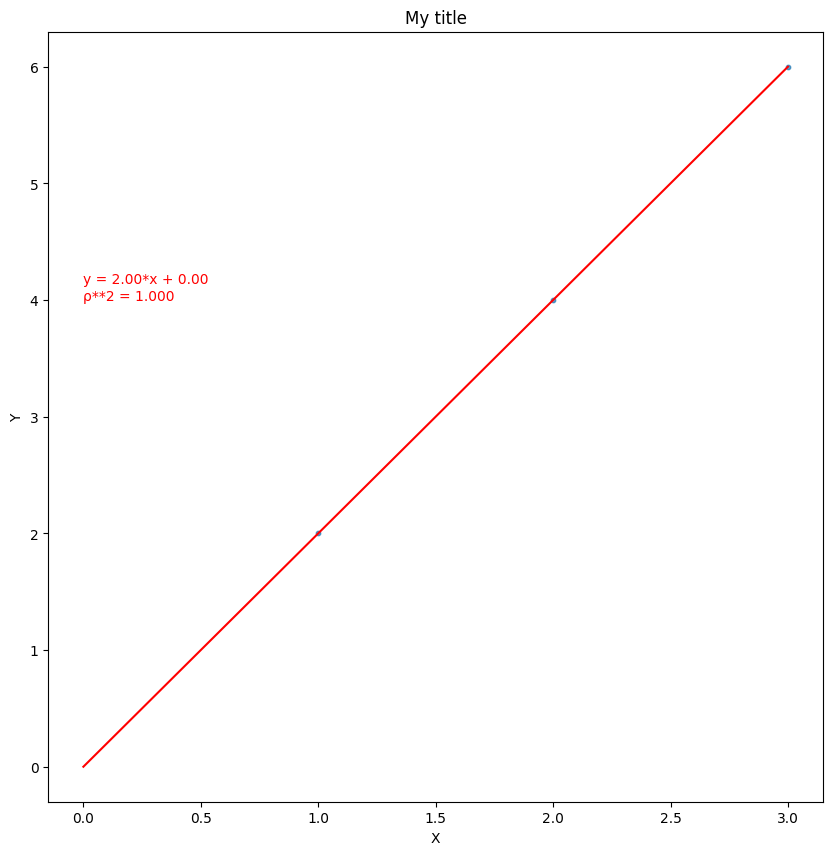

In [5]:
graph([1, 2, 3], [2, 4, 6], "X", "Y", "My title")